# Project : Bank Telemarketing Campaign

## Goal : The bank aims to enhance its revenue by conducting a cost-efficient telemarketing campaign for term deposits among existing customers. Term deposits, fixed investments with predetermined interest rates, serve to foster long-term customer relationships. 

## Obj : 
### 1. Understanding the Dataset
### 2. Descriptive Statistics
### 3. Univariate Analysis
### 4. Bivariate Analysis
### 5. Categorical Variables Analysis
### 6. Temporal Analysis
### 7. Feature Engineering
### 8. Correlation Analysis
### 9. Outlier Detection and Handling



# Task :1. Understanding the Dataset
### Q.1.(a.) Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.
### Q.1(b.) Inspect for any instances of missing values, outliers, or data inconsistencies


## Import Libraries

In [300]:
# standard imports
import os
# Third -party imports
import pandas as pd # for data processing, I/O csv file
import numpy as np # for linear algebra 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()


### Load Dataset : 

In [431]:
print("Load dataset : Tele-Marketing Campaign")
print("----------------------------------------\n")
print("STEP (A) Deleted first two rows from raw data \n")
print("STEP (B) Load dataset \n")

df = pd.read_csv(r"C:\Users\arunr\Desktop\ABADS Batch 12\Python\Capstone project\bank_marketing_updated_v1.csv")
print(df.head())

## Preparing Data for Analysis:
### STEP #1 : Spilt column 'jobedu'and 'month'
### STEP #2 : Reordering Columns
print("\nSTEP (C) Understanding Dataset:")
print("\nSTEP 1: Split 'jobedu' column & Reorder dataset")
print("--------------------------------------------------")
print("\nSTEP 1(a): Split 'jobedu' column")
# Split 'jobedu' column
df_split = df['jobedu'].str.split(',',expand = True)
df_split.columns = ['job','education']
df_final =pd.concat([df,df_split],axis =1)
df_final = df_final.drop(columns =['jobedu'])
print(df_final.columns)


#Reordering Columns

print("\nSTEP 1(b):Reordering 'job' and 'education' Columns:")
column_to_move = ['job', 'education']
new_position = 5
columns = df_final.columns.tolist()
columns = [col for col in columns if col not in column_to_move]  # Remove columns to move
columns = columns[:new_position] + column_to_move + columns[new_position:]  # Insert new position
df_final = df_final[columns]
print(df_final.columns)
df = df_final

# Split 'month' column
print("\n\nSTEP :2 Split 'month' column, find missing values & Reorder dataset")
print("----------------------------------------------------------------------")
print ("\nSTEP 2(a): Check for null valued rows in 'month' column and drop them. ")
print("\nNo. of null valued rows in 'month' column : ",pd.isnull(df['month']).sum())
df.dropna(subset=['month'], inplace=True)
print("\nSTEP 2(b) : Split 'month' column:")
df_split = df['month'].str.split(',',expand = True)
df_split.columns = ['mnth','year']
df_month_final =pd.concat([df,df_split],axis =1)
df_month_final = df_month_final.drop(columns =['month'])
df_month_final.rename(columns = {'mnth':'month'},inplace = True)
print(df_month_final.columns)

#Reordering 'date', 'month', 'year' Columns
print("\nSTEP 2(c) :Reordering 'date', 'month', 'year' Columns")
column_to_move = ['month', 'year']
new_position = 13
columns = df_month_final.columns.tolist()
columns = [col for col in columns if col not in column_to_move]  # Remove columns to move
columns = columns[:new_position] + column_to_move + columns[new_position:]  # Insert new position
df_date_final = df_month_final[columns]
print(df_date_final.columns)
df = df_date_final

# Combine date, month and year
# STEP :3.a Check day column has null value
print("\n\nSTEP :3  Check for Missing values and Create date column in pd.datetime format:")
print("--------------------------------------------------")
print("\nSTEP(3.a) : Check for null values in 'day' column :")
day_null_check = pd.isnull(df['day']).sum()
print(f"Null values in 'day' column: {day_null_check}\n")

# STEP :3.b Combine day, month and year columns to form [date] column 
print("\nSTEP(3.b) :Combine day, month and year columns to form [date] column")
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2) + '-' + df['day'].astype(str).str.zfill(2)
print(df.columns)

#STEP : 3.c Reordering 'date' Columns
column_to_move = ['date']
new_position = 12
columns = df.columns.tolist()
columns = [col for col in columns if col not in column_to_move]  # Remove columns to move
columns = columns[:new_position] + column_to_move + columns[new_position:]  # Insert new position
df = df[columns]
print("\nSTEP(3.c) : Reordering 'date' Columns:")
print(df.columns)

# STEP : 3.d Change date column to datetime format
print("\nSTEP(3.d) : Check dtype of 'date' Columns:")
df['date'] = pd.to_datetime(df.date)
dtype_date = df['date'].dtype
print(f"Data type of df['date'] : {dtype_date}")

# Drop columns added to dataset for Preprocessing dataset
print("\n\nSTEP 4: Drop columns added to dataset for Preprocessing dataset :")
print("----------------------------------------------------------------")
df = df.drop (columns = ['day','month','year','duration','duration(min)'])
print("STEP 4(a) : Check column names and rename if necessary -")
df = df.rename(columns = {'final' : 'call_duration'})
print("\ndf[columns] :")
columns = df.columns
print(columns)

print("\n\nSTEP 5:Rename columns (if necessary) :")
print("-----------------------------------------")
# Rename columns (if necessary)
df.rename({'marital':'marital_status','salary':'income','campaign':'total_no_of_campaign','balance':'balance_amt','housing' : 'housing_loan',
           'loan' : 'personal_loan','pdays':'days_after_previous_campaign','response':'term-deposit_response',
          'previous':'no_of_prev_campaign','poutcome':'previous_outcome'},axis = 1, inplace = True)
print("\nList of column name after Rename command:")
print(df.columns)

print("Create DataFrame\n")
df = pd.DataFrame(df) 
print(f"\nShape of DataFrame (df) :{df.shape}")
print(df.info())

print("\n\nCheck for any strings in df['total_no_of_campaign']: ")

# Delete rows with strings in df['total_no_of_campaign']
df = df[df['total_no_of_campaign'].apply(lambda x: not isinstance(x, str))]

#  Convert datatype to int
df['total_no_of_campaign'] = df['total_no_of_campaign'].astype(int)


print(df.info())
df.head()


Load dataset : Tele-Marketing Campaign
----------------------------------------

STEP (A) Deleted first two rows from raw data 

STEP (B) Load dataset 

   customerid   age  salary  balance   marital                  jobedu  \
0       22938  35.0   60000     5535   married    technician,secondary   
1       36426  31.0  120000      162   married  entrepreneur,secondary   
2        6425  53.0  100000      351   married      management,primary   
3       31741  39.0   60000    17441  divorced    technician,secondary   
4       44759  28.0   50000     1595   married        admin.,secondary   

  targeted default housing loan  ... day      month                duration  \
0      yes      no      no   no  ...  26  aug, 2017                   0 min   
1      yes      no     yes  yes  ...  11  may, 2017                   0 min   
2      yes      no     yes   no  ...  27  may, 2017                   0 sec   
3      yes      no     yes  yes  ...   7  apr, 2017  0.0166666666666667 min   
4      

,customerid,age,income,balance_amt,marital_status,job,education,targeted,default,housing_loan,personal_loan,contact,date,call_duration,total_no_of_campaign,days_after_previous_campaign,no_of_prev_campaign,previous_outcome,term-deposit_response
0,22938,35.0,60000,5535,married,technician,secondary,yes,no,no,no,cellular,2017-08-26,0,15,-1,0,unknown,no
1,36426,31.0,120000,162,married,entrepreneur,secondary,yes,no,yes,yes,cellular,2017-05-11,0,2,-1,0,unknown,no
2,6425,53.0,100000,351,married,management,primary,yes,no,yes,no,unknown,2017-05-27,0,4,-1,0,unknown,no
3,31741,39.0,60000,17441,divorced,technician,secondary,yes,no,yes,yes,cellular,2017-04-07,1,1,-1,0,unknown,no
4,44759,28.0,50000,1595,married,admin.,secondary,yes,no,no,no,unknown,2017-09-09,1,1,254,4,success,no


## Create Age-Group

In [433]:
# Define age bins and labels
bins = [0, 25, 35, 45, 55, 65, 100]  # Adjust the upper limit as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create a new column 'Age Group' using pd.cut
df['Age-Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


### Display the updated DataFrame


In [434]:
print(df[['age', 'Age-Group']].head())

    age Age-Group
0  35.0     26-35
1  31.0     26-35
2  53.0     46-55
3  39.0     36-45
4  28.0     26-35


In [435]:
#STEP : 3.c Reordering Columns
column_to_move = ['Age-Group']
new_position = 5
columns = df.columns.tolist()
columns = [col for col in columns if col not in column_to_move]  # Remove columns to move
columns = columns[:new_position] + column_to_move + columns[new_position:]  # Insert new position
df = df[columns]
print("\nSTEP(3.c) : Reordering 'AGE-GROUP' Columns:")

print(df.columns)


STEP(3.c) : Reordering 'AGE-GROUP' Columns:
Index(['customerid', 'age', 'income', 'balance_amt', 'marital_status',
       'Age-Group', 'job', 'education', 'targeted', 'default', 'housing_loan',
       'personal_loan', 'contact', 'date', 'call_duration',
       'total_no_of_campaign', 'days_after_previous_campaign',
       'no_of_prev_campaign', 'previous_outcome', 'term-deposit_response'],
      dtype='object')


In [436]:
df.head()

,customerid,age,income,balance_amt,marital_status,Age-Group,job,education,targeted,default,housing_loan,personal_loan,contact,date,call_duration,total_no_of_campaign,days_after_previous_campaign,no_of_prev_campaign,previous_outcome,term-deposit_response
0,22938,35.0,60000,5535,married,26-35,technician,secondary,yes,no,no,no,cellular,2017-08-26,0,15,-1,0,unknown,no
1,36426,31.0,120000,162,married,26-35,entrepreneur,secondary,yes,no,yes,yes,cellular,2017-05-11,0,2,-1,0,unknown,no
2,6425,53.0,100000,351,married,46-55,management,primary,yes,no,yes,no,unknown,2017-05-27,0,4,-1,0,unknown,no
3,31741,39.0,60000,17441,divorced,36-45,technician,secondary,yes,no,yes,yes,cellular,2017-04-07,1,1,-1,0,unknown,no
4,44759,28.0,50000,1595,married,26-35,admin.,secondary,yes,no,no,no,unknown,2017-09-09,1,1,254,4,success,no


## Q.1(b.) Inspect for any instances of missing values, outliers, or data inconsistencies 
### Checking for further missing values:

In [437]:
missing_df =df.isna().sum()
print(missing_df)

customerid                       0
age                             14
income                           0
balance_amt                      0
marital_status                   0
Age-Group                       14
job                              0
education                        0
targeted                         0
default                          0
housing_loan                     0
personal_loan                    0
contact                          0
date                             0
call_duration                    0
total_no_of_campaign             0
days_after_previous_campaign     0
no_of_prev_campaign              0
previous_outcome                 0
term-deposit_response           20
dtype: int64


## Missing values -
### (a)df['age'] :14
### (b) df['response_to_open_term-deposit-account'] : 20

## Handling missing values in 'Age-Group' column (Categorial attribute)
### : Using mode()[0]

In [438]:
 mode_value = df['Age-Group'].mode()[0]
 df['Age-Group'] = df['Age-Group'].fillna(mode_value)

## Handling missing values in 'age' column (Numerical Attribute)
### : Using mean()

In [439]:
mean_age = df['age'].mean()  # Compute the mean of the 'age' column
df_age_fill =  df['age'].fillna(mean_age, inplace=True)  # Fill missing values with the mean
print(" Checking for any missing values in 'age' column further ")
missing_age_handled = df.isna().sum()
print(missing_age_handled)

df['age'] = df['age'].astype(int)

 Checking for any missing values in 'age' column further 
customerid                       0
age                              0
income                           0
balance_amt                      0
marital_status                   0
Age-Group                        0
job                              0
education                        0
targeted                         0
default                          0
housing_loan                     0
personal_loan                    0
contact                          0
date                             0
call_duration                    0
total_no_of_campaign             0
days_after_previous_campaign     0
no_of_prev_campaign              0
previous_outcome                 0
term-deposit_response           20
dtype: int64


## Handling missing values in 'response_to_campaign' column:

In [440]:
mode_value = df['term-deposit_response'].mode()[0]
response_handling = df['term-deposit_response'].fillna(mode_value, inplace =True)
print(" Checking for any missing values in 'term-deposit_response' column further :\n ")
missing_response_handled = df.isna().sum()
print(missing_response_handled)


 Checking for any missing values in 'term-deposit_response' column further :
 
customerid                      0
age                             0
income                          0
balance_amt                     0
marital_status                  0
Age-Group                       0
job                             0
education                       0
targeted                        0
default                         0
housing_loan                    0
personal_loan                   0
contact                         0
date                            0
call_duration                   0
total_no_of_campaign            0
days_after_previous_campaign    0
no_of_prev_campaign             0
previous_outcome                0
term-deposit_response           0
dtype: int64


## Data Description : 

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32729 entries, 0 to 32767
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customerid                    32729 non-null  int64         
 1   age                           32729 non-null  int64         
 2   income                        32729 non-null  int64         
 3   balance_amt                   32729 non-null  int64         
 4   marital_status                32729 non-null  object        
 5   Age-Group                     32729 non-null  category      
 6   job                           32729 non-null  object        
 7   education                     32729 non-null  object        
 8   targeted                      32729 non-null  object        
 9   default                       32729 non-null  object        
 10  housing_loan                  32729 non-null  object        
 11  personal_loan                 327

## Sort dataset & Preparing dataset for Analysis: 

In [442]:
df_sorted = df.sort_values(by='customerid', ascending=True)
df_sorted_reset =df_sorted.reset_index(drop =True)
df = df_sorted_reset
print("Shape of Prepared dataset :",df.shape)
df.head()



Shape of Prepared dataset : (32729, 20)


,customerid,age,income,balance_amt,marital_status,Age-Group,job,education,targeted,default,housing_loan,personal_loan,contact,date,call_duration,total_no_of_campaign,days_after_previous_campaign,no_of_prev_campaign,previous_outcome,term-deposit_response
0,1,58,100000,2143,married,56-65,management,tertiary,yes,no,yes,no,unknown,2017-05-05,261,1,-1,0,unknown,no
1,2,44,60000,29,single,36-45,technician,secondary,yes,no,yes,no,unknown,2017-05-05,151,1,-1,0,unknown,no
2,5,33,0,1,single,26-35,unknown,unknown,no,no,no,no,unknown,2017-05-05,198,1,-1,0,unknown,no
3,6,35,100000,231,married,26-35,management,tertiary,yes,no,yes,no,unknown,2017-05-05,139,1,-1,0,unknown,no
4,7,28,100000,447,single,26-35,management,tertiary,no,no,yes,yes,unknown,2017-05-05,217,1,-1,0,unknown,no


## (Q.1.b) Handling Missing Values :
## Result :
## (1)Create date column combining date and month columns
## (2)Missing values in age and response columns were successfully handled.
## (3)Rows with strings in df['total_no_of_campaign'] are removed.

#

# Q(2.) Descriptive Statistics
## (a.) Derive summary statistics (mean, median, standard deviation) for relevant columns.
## (b.) Examine the distribution of the target variable, indicating responses to the term deposit campaign.


# Ans: 
## STEP 1 : Data Preparation:
## Separate Numerical variables and prepare for Analysis

# Various Data Type Columns in Dataset:
## i) Numeric data type: 
### salary, balance, duration, age, total_no_of_campaign, days_after_previous_campaign,
## ii) Categorical data type: 
### job, education, marital_status, housing_loan, personal_loan, means_of_contact,previous_outcome, response_to_present_campaign
## iii) Time and date type : 
### date


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32729 entries, 0 to 32728
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customerid                    32729 non-null  int64         
 1   age                           32729 non-null  int64         
 2   income                        32729 non-null  int64         
 3   balance_amt                   32729 non-null  int64         
 4   marital_status                32729 non-null  object        
 5   Age-Group                     32729 non-null  category      
 6   job                           32729 non-null  object        
 7   education                     32729 non-null  object        
 8   targeted                      32729 non-null  object        
 9   default                       32729 non-null  object        
 10  housing_loan                  32729 non-null  object        
 11  personal_loan               

# Q(2.a) Derive summary statistics (mean, median, standard deviation) for relevant columns.

## Numerical variables: age, salary, balance_amt, call_duration,total_no_of_campaign,days_after_previous_campaign


NUMERICAL DATA TYPE:
-------------------------
Index(['age', 'income', 'balance_amt', 'call_duration', 'total_no_of_campaign',
       'days_after_previous_campaign'],
      dtype='object')

CHECKING DATA TYPE:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32729 entries, 0 to 32728
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           32729 non-null  int64
 1   income                        32729 non-null  int64
 2   balance_amt                   32729 non-null  int64
 3   call_duration                 32729 non-null  int64
 4   total_no_of_campaign          32729 non-null  int64
 5   days_after_previous_campaign  32729 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB
None
************************************************************************************************************************


DATA DESC.OF NUMERICAL VARIABLES:
Note : In df['days_after

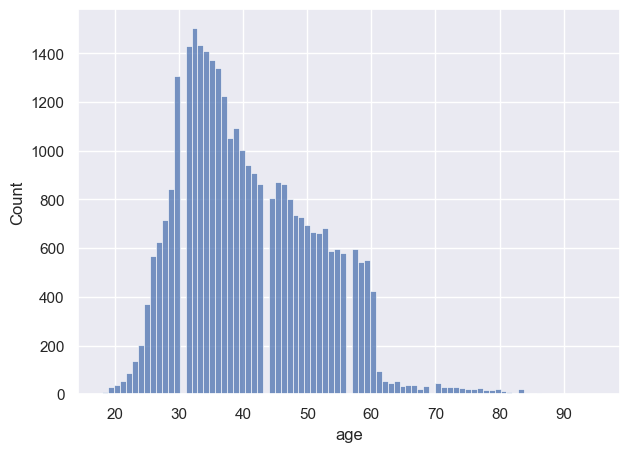

Mode of age = 0    32
Name: age, dtype: int64
Mean of age = 40.93574505789972
Median of age : 39.0
Standard Deviation of age: 10.488720460619852
--------------------------------------------------------------------------------

Statistical summary of df['income']

count     32729.000000
mean      57243.851019
std       32118.461043
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: income, dtype: float64

 Axes(0.125,0.11;0.775x0.77)


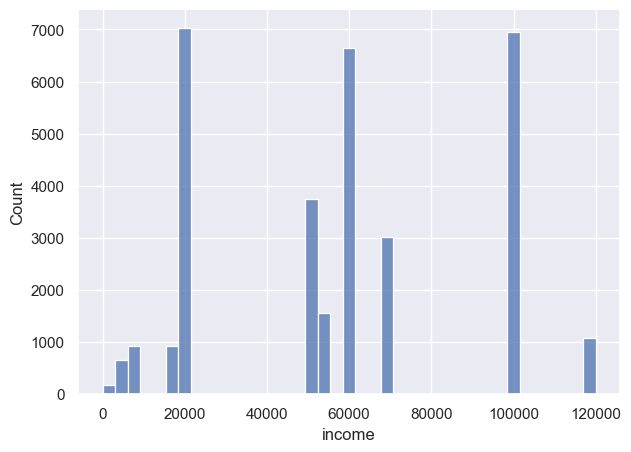

Mode of income = 0    20000
Name: income, dtype: int64
Mean of income = 57243.851018974
Median of income : 60000.0
Standard Deviation of income: 32118.461042715466
--------------------------------------------------------------------------------

Statistical summary of df['balance_amt']

count     32729.000000
mean       1346.590027
std        3065.121325
min       -8019.000000
25%          67.000000
50%         433.000000
75%        1389.000000
max      102127.000000
Name: balance_amt, dtype: float64

 Axes(0.125,0.11;0.775x0.77)


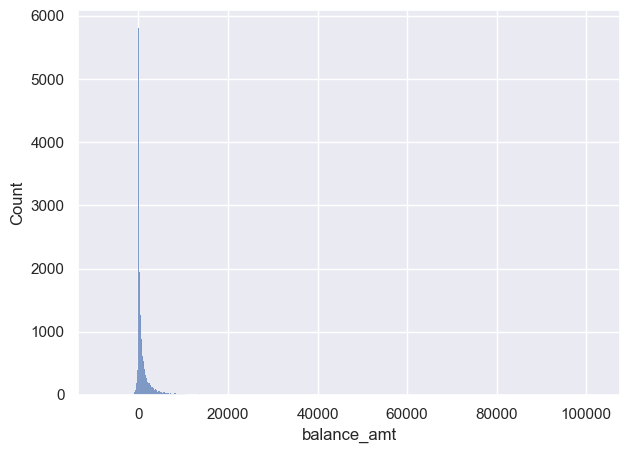

Mode of balance_amt = 0    0
Name: balance_amt, dtype: int64
Mean of balance_amt = 1346.5900271930093
Median of balance_amt : 433.0
Standard Deviation of balance_amt: 3065.1213247380197
--------------------------------------------------------------------------------

Statistical summary of df['call_duration']

count    32729.000000
mean       221.153014
std        263.370636
min          0.000000
25%         99.000000
50%        152.000000
75%        222.000000
max       3881.000000
Name: call_duration, dtype: float64

 Axes(0.125,0.11;0.775x0.77)


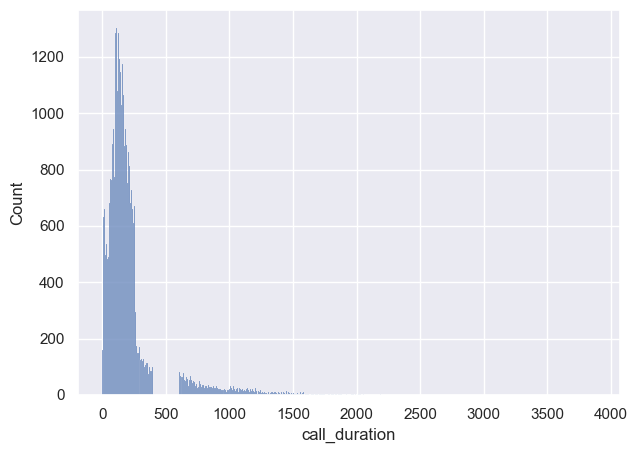

Mode of call_duration = 0    124
Name: call_duration, dtype: int64
Mean of call_duration = 221.1530141464756
Median of call_duration : 152.0
Standard Deviation of call_duration: 263.3706362187691
--------------------------------------------------------------------------------

Statistical summary of df['total_no_of_campaign']

count    32729.000000
mean         2.870635
std          3.286930
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: total_no_of_campaign, dtype: float64

 Axes(0.125,0.11;0.775x0.77)


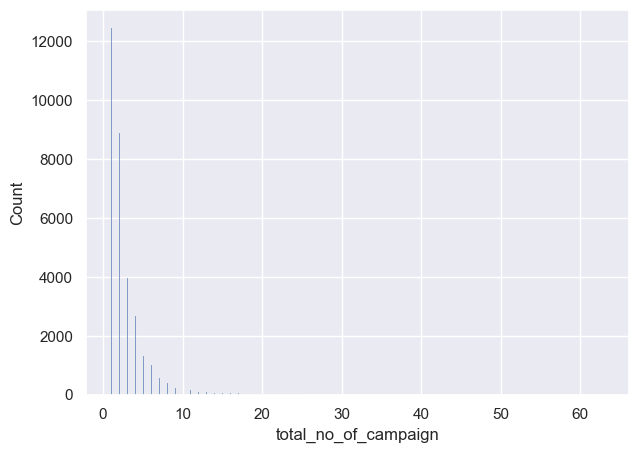

Mode of total_no_of_campaign = 0    1
Name: total_no_of_campaign, dtype: int64
Mean of total_no_of_campaign = 2.8706346053958263
Median of total_no_of_campaign : 2.0
Standard Deviation of total_no_of_campaign: 3.286929716001462
--------------------------------------------------------------------------------

Statistical summary of df['days_after_previous_campaign']

count    32729.000000
mean        39.828104
std         99.465443
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: days_after_previous_campaign, dtype: float64

 Axes(0.125,0.11;0.775x0.77)


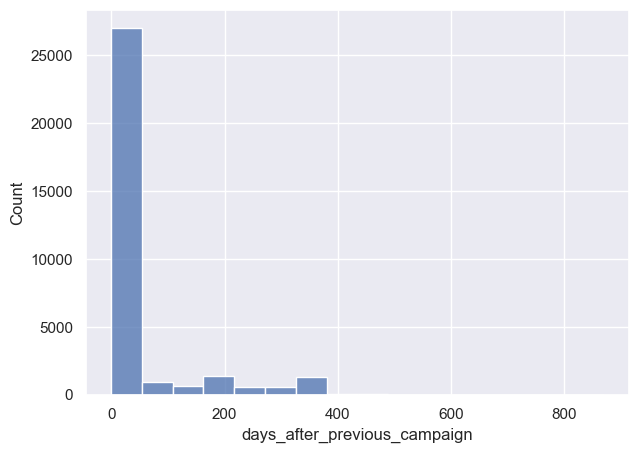

Mode of days_after_previous_campaign = 0   -1
Name: days_after_previous_campaign, dtype: int64
Mean of days_after_previous_campaign = 39.82810351675884
Median of days_after_previous_campaign : -1.0
Standard Deviation of days_after_previous_campaign: 99.46544286863931
--------------------------------------------------------------------------------


In [446]:
#Program:
num_df = df[[ 'age','income','balance_amt','call_duration','total_no_of_campaign','days_after_previous_campaign']]
print("\nNUMERICAL DATA TYPE:")
print("-"*25)
print(num_df.columns)
print("\nCHECKING DATA TYPE:\n")
print(num_df.info())
print("*" * 120)


print("\n\nDATA DESC.OF NUMERICAL VARIABLES:")

print("Note : In df['days_after_previous_campaign'], ‘-1’ represents that the customers who has never been reached by Bank for any products")
for col in num_df.columns:
    print(f"\nStatistical summary of df['{col}']\n")
    print(num_df[col].describe())
    fig = plt.figure(figsize=(7,5))
    print(f"\n {sns.histplot(num_df[col])}")
    plt.show()

    mode = num_df[col].mode()
    mean =num_df[col].mean()
    median = num_df[col].median()
    std_dev = num_df[col].std()
    print(f'Mode of {col} = {mode}')
    print(f'Mean of {col} = {mean}')
    print(f'Median of {col} : {median}')
    print(f'Standard Deviation of {col}: {std_dev}')
    print("-" * 80)

## Statistical summary (mean, median, standard deviation) directly using df.describe().

In [445]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,32729.0,22687.951755,1.0,12019.0,22840.0,33557.0,45209.0,12784.899067
age,32729.0,40.935745,18.0,33.0,39.0,48.0,95.0,10.48872
income,32729.0,57243.851019,0.0,20000.0,60000.0,70000.0,120000.0,32118.461043
balance_amt,32729.0,1346.590027,-8019.0,67.0,433.0,1389.0,102127.0,3065.121325
date,32729,2017-06-21 17:24:43.491704576,2017-01-06 00:00:00,2017-05-09 00:00:00,2017-06-05 00:00:00,2017-08-07 00:00:00,2017-12-31 00:00:00,NaN
call_duration,32729.0,221.153014,0.0,99.0,152.0,222.0,3881.0,263.370636
total_no_of_campaign,32729.0,2.870635,1.0,1.0,2.0,3.0,63.0,3.28693
days_after_previous_campaign,32729.0,39.828104,-1.0,-1.0,-1.0,-1.0,871.0,99.465443
no_of_prev_campaign,32729.0,0.569281,0.0,0.0,0.0,0.0,51.0,1.890077


## 2.b) Examine the distribution of the target variable, indicating responses to the term deposit campaign?

term-deposit_response
no     29720
yes     3009
dtype: int64


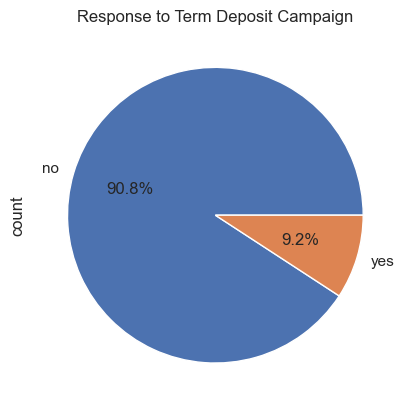

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
print(df.groupby('term-deposit_response').size())
term_deposit_response = df['term-deposit_response'].value_counts()
term_deposit_response.plot.pie(autopct='%1.1f%%')
plt.title("Response to Term Deposit Campaign")
plt.show()

# TASK No- 3 : Univariate Analysis
## a) Examine the distribution of individual key features, such as age, balance, and call duration.
## b) Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

## 3a) Examine the distribution of individual key features, such as age, balance, and call duration.


UNIVARIATE ANALYSIS OF df['age']:

count    32729.000000
mean        40.935745
std         10.488720
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


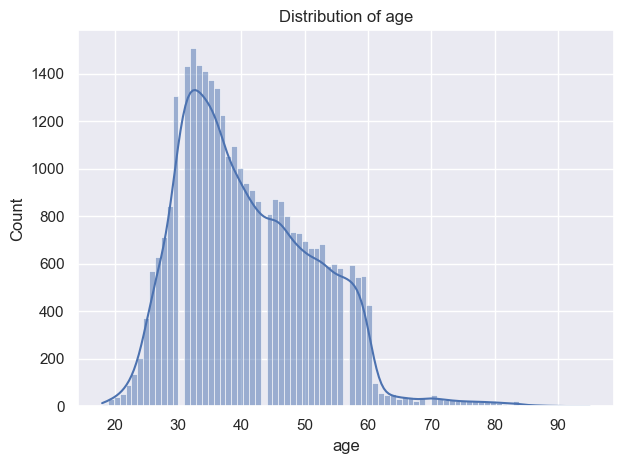

Mode of age = 0    32
Name: age, dtype: int64
Mean of age = 40.93574505789972
Median of age : 39.0
Standard Deviation of age: 10.488720460619852
********************************************************************************

UNIVARIATE ANALYSIS OF df['balance_amt']:

count     32729.000000
mean       1346.590027
std        3065.121325
min       -8019.000000
25%          67.000000
50%         433.000000
75%        1389.000000
max      102127.000000
Name: balance_amt, dtype: float64


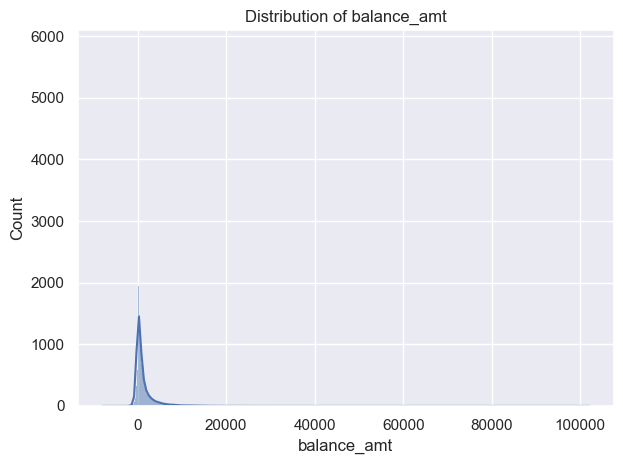

Mode of balance_amt = 0    0
Name: balance_amt, dtype: int64
Mean of balance_amt = 1346.5900271930093
Median of balance_amt : 433.0
Standard Deviation of balance_amt: 3065.1213247380197
********************************************************************************

UNIVARIATE ANALYSIS OF df['call_duration']:

count    32729.000000
mean       221.153014
std        263.370636
min          0.000000
25%         99.000000
50%        152.000000
75%        222.000000
max       3881.000000
Name: call_duration, dtype: float64


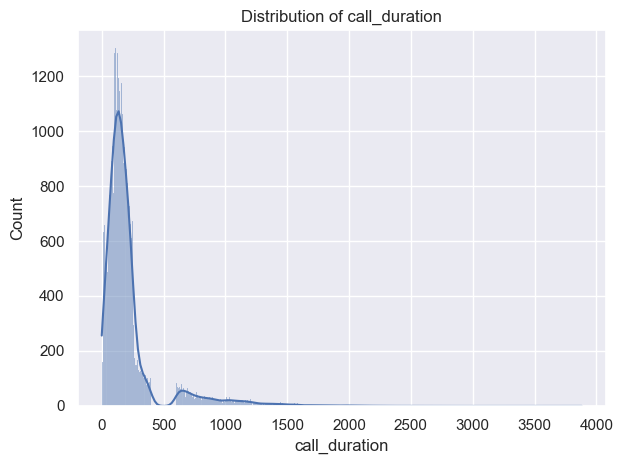

Mode of call_duration = 0    124
Name: call_duration, dtype: int64
Mean of call_duration = 221.1530141464756
Median of call_duration : 152.0
Standard Deviation of call_duration: 263.3706362187691
********************************************************************************


In [448]:
features = ['age', 'balance_amt','call_duration']
for col in features:
    plt.figure()
    print(f"\nUNIVARIATE ANALYSIS OF df['{col}']:\n")
    print(num_df[col].describe())
    # Histogram
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    mode = df[col].mode()
    mean =df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    
    print(f'Mode of {col} = {mode}')
    print(f'Mean of {col} = {mean}')
    print(f'Median of {col} : {median}')
    print(f'Standard Deviation of {col}: {std_dev}')
    print("*" * 80)


## Count Plot : JOB TYPE

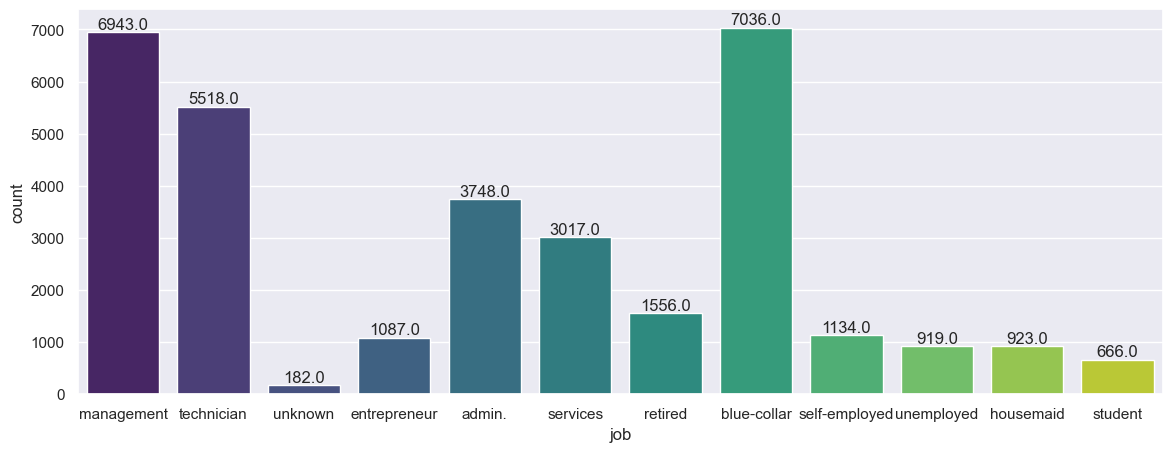

In [449]:
plt.figure(figsize=(14, 5))
count_plot = sns.countplot(x='job', data=df, palette='viridis')

for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')


# Statistical Summary:
## (i)Mean, Mode, Median and Std Dev were found. 
## (ii)The spread of distribution is clearly shown

# 3b) Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

## Histogram: Shows shape of the distribution. normal, skewed to the left or right, or multimodal
## Box Plot: Shows outliers based on the whiskers and points beyond them.
## KDE Plot : Show mode of the distribution
## Violin Plot: Combine the features of a box plot with a kernel density estimation to show the distribution shape

Feature :age
--------------------
Median of age: 39.0
Standard Deviation of age: 10.488720460619852
Maximum age : 95
Minimum age : 18 


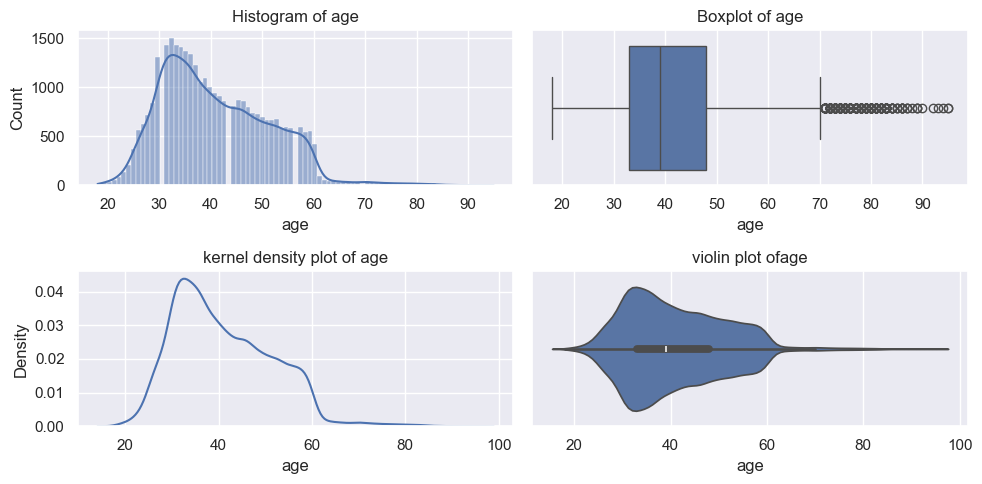

****************************************************************************************************
Feature :balance_amt
--------------------
Median of balance_amt: 433.0
Standard Deviation of balance_amt: 3065.1213247380197
Maximum balance_amt : 102127
Minimum balance_amt : -8019 


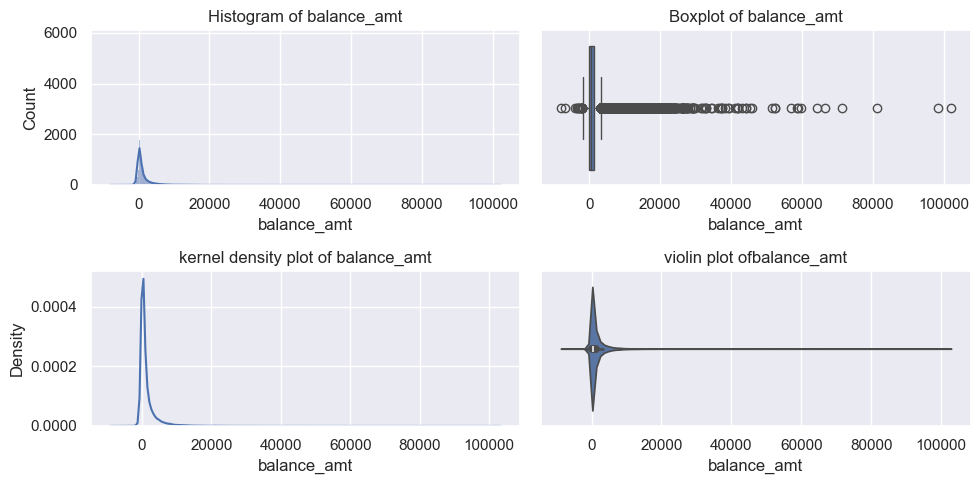

****************************************************************************************************
Feature :call_duration
--------------------
Median of call_duration: 152.0
Standard Deviation of call_duration: 263.3706362187691
Maximum call_duration : 3881
Minimum call_duration : 0 


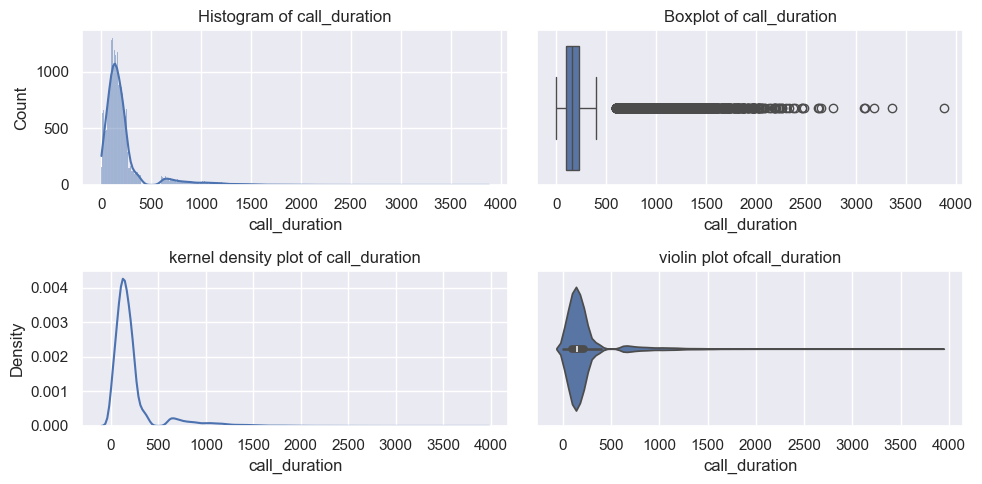

****************************************************************************************************


In [450]:
# List numerical variables
features = ['age', 'balance_amt','call_duration']

for col in features:
    plt.figure(figsize=(10, 5))
    print(f"Feature :{col}")
    print("-"*20)
    
    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Kdeplot
    plt.subplot(2, 2, 3)
    sns.kdeplot(x=df[col])
    plt.title(f'kernel density plot of {col}')

    #violinplot
    plt.subplot(2, 2, 4)
    sns.violinplot(x = df[col])
    plt.title(f'violin plot of{col}')

    
    # additional calculation
    median = df[col].median()
    std_dev = df[col].std()
    Max = df[col].max()
    Min = df[col].min()
    print(f'Median of {col}: {median}')
    print(f'Standard Deviation of {col}: {std_dev}')
    print(f"Maximum {col} : {Max}")
    print(f"Minimum {col} : {Min} ")

    plt.tight_layout()
    plt.show()

    print("*" * 100)


# TASK - 4. Bivariate Analysis
## (a) Evaluate the relationship between independent variables and the target variable.
## (b) Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.


## 4(a) Evaluate the relationship between Independent Variables and the Target Variable Term-Deposit_Response.

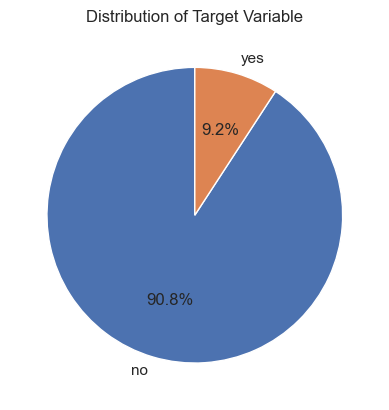

In [451]:
target_variables = ['term-deposit_response']

y_distribution = df['term-deposit_response'].value_counts()
y_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.ylabel('')  # Hides the y-label for aesthetics
plt.show()


## Relationship btw Age-Group and the Target Variable (Term-Deposit_Response)

## General Response

Age-Group  term-deposit_response
18-25      no                         753
           yes                        174
26-35      no                       10155
           yes                       1069
36-45      no                        9334
           yes                        763
46-55      no                        6495
           yes                        523
56-65      no                        2658
           yes                        320
66+        no                         325
           yes                        160
Name: count, dtype: int64


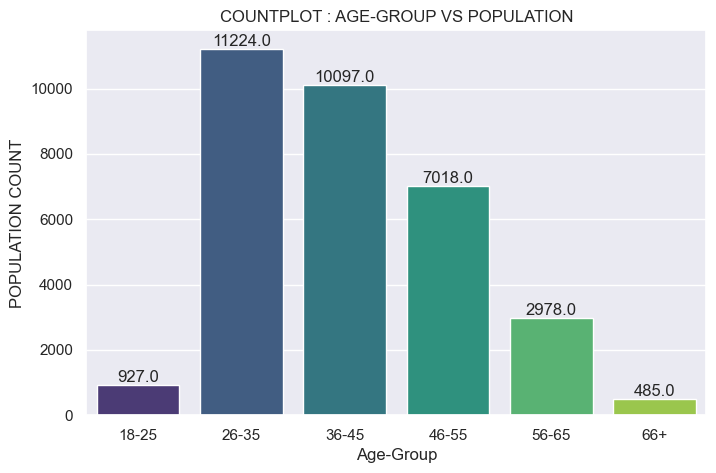

In [452]:
# Group by age group and calculate subscription counts
age_group_subscription_response = df.groupby('Age-Group')['term-deposit_response'].value_counts()

## Plotting countplot of Age-Group
plt.figure(figsize=(8, 5))
count_plot = sns.countplot(x='Age-Group', data=df, palette='viridis')
plt.title("COUNTPLOT : AGE-GROUP VS POPULATION")
plt.ylabel("POPULATION COUNT")
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')


# Display the results
print(age_group_subscription_response)

## Relationship btw Job Type and the Target Variable (Term-Deposit_Response)

job            term-deposit_response
admin.         no                       3383
               yes                       365
blue-collar    no                       6628
               yes                       408
entrepreneur   no                       1017
               yes                        70
housemaid      no                        857
               yes                        66
management     no                       6186
               yes                       757
retired        no                       1283
               yes                       273
self-employed  no                       1032
               yes                       102
services       no                       2800
               yes                       217
student        no                        507
               yes                       159
technician     no                       5045
               yes                       473
unemployed     no                        815
               yes

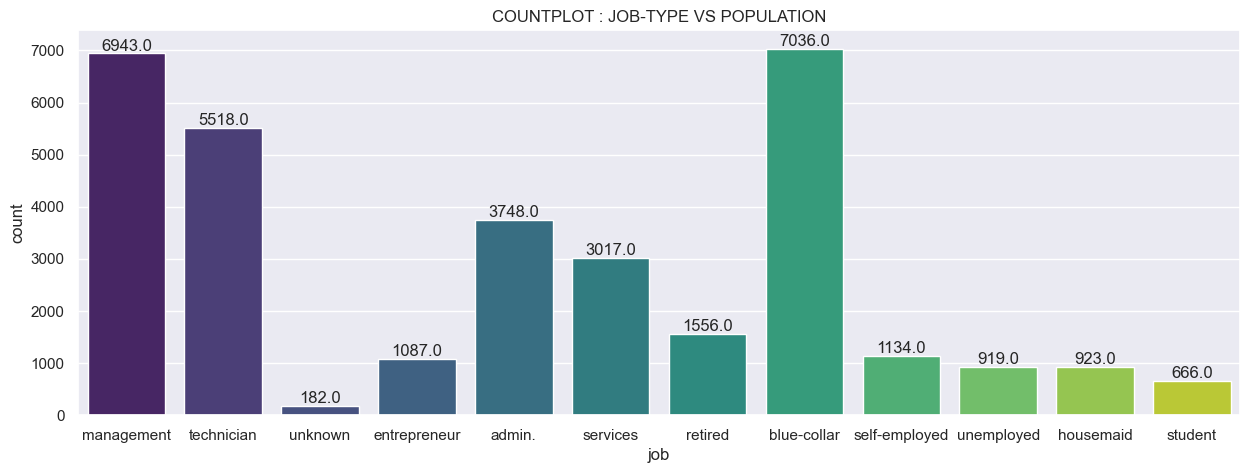

In [453]:
# Group by age group and calculate subscription counts
age_group_subscription_response = df.groupby('job')['term-deposit_response'].value_counts()

## Plotting countplot of Age-Group
plt.figure(figsize=(15, 5))
count_plot = sns.countplot(x='job', data=df, palette='viridis')
plt.title("COUNTPLOT : JOB-TYPE VS POPULATION")
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')


# Display the results
print(age_group_subscription_response)

## Relationship btw Marital Status and the Target Variable (Term-Deposit_Response)

marital_status  term-deposit_response
divorced        no                        3418
                yes                        363
married         no                       18258
                yes                       1554
single          no                        8044
                yes                       1092
Name: count, dtype: int64


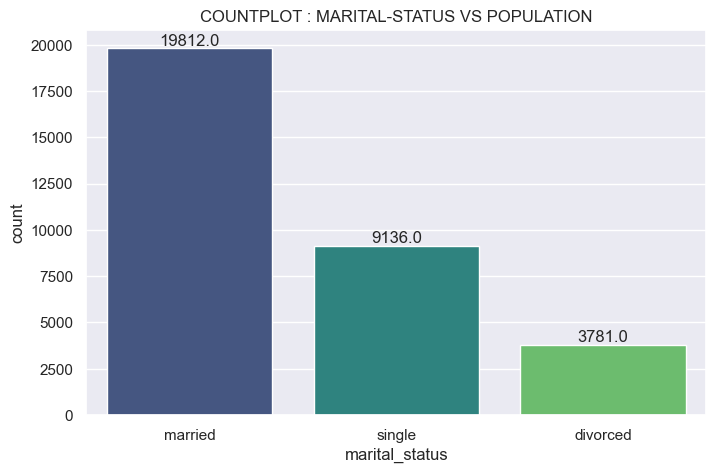

In [454]:
# Group by age group and calculate subscription counts
marital_status_subscription_response = df.groupby('marital_status')['term-deposit_response'].value_counts()

## Plotting countplot of Age-Group
plt.figure(figsize=(8, 5))
count_plot = sns.countplot(x='marital_status', data=df, palette='viridis')
plt.title("COUNTPLOT : MARITAL-STATUS VS POPULATION")
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')


# Display the results
print(marital_status_subscription_response)

## 4(b) Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.


## (i) Categorical vs Categorical 
### (a)Age-Group vs. Term-Deposit Response

# Plotting the Stacked Bar Chart

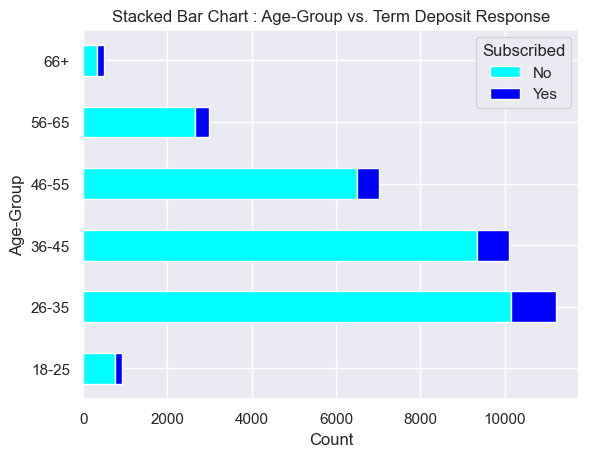

In [455]:
# Plotting the stacked bar chart
age_subscription_counts.plot(kind='barh', stacked=True, color=['cyan', 'blue'])

# Adding titles and labels
sns.set_style('darkgrid')
plt.title('Stacked Bar Chart : Age-Group vs. Term Deposit Response')
plt.xlabel('Count')
plt.ylabel('Age-Group')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Subscribed', labels=['No', 'Yes'])
plt.show()


### Job Type vs Term Deposit Accounts

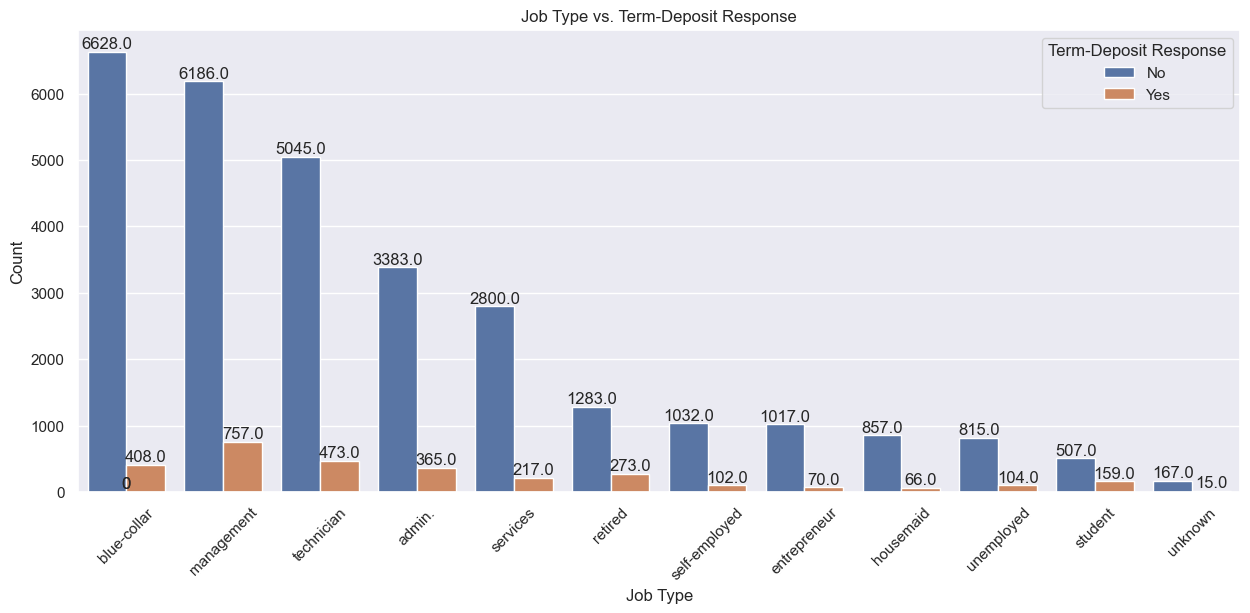

In [456]:
# Count plot for Job vs. Subscribed
plt.figure(figsize=(15, 6))

count_plot = sns.countplot(data=df, x='job', hue='term-deposit_response', order=df['job'].value_counts().index)
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')
plt.title('Job Type vs. Term-Deposit Response')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Term-Deposit Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


## Marital Status vs Term-Deposit Subscription 

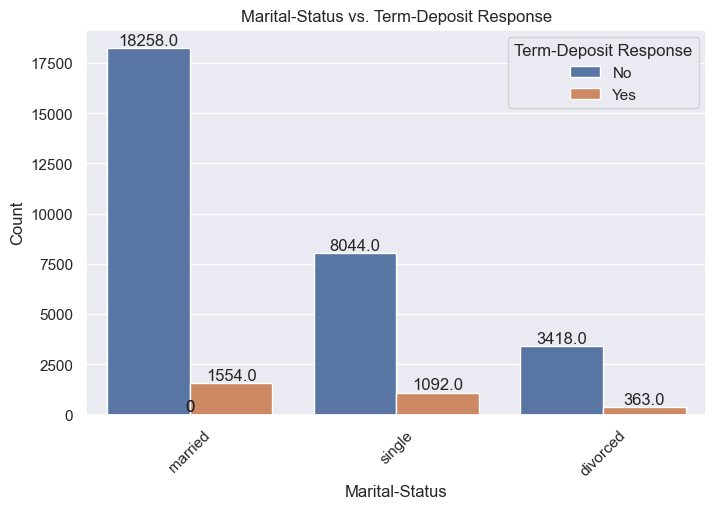

In [457]:
plt.figure(figsize=(8, 5))

count_plot = sns.countplot(data=df, x='marital_status', hue='term-deposit_response', order=df['marital_status'].value_counts().index)
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

plt.title('Marital-Status vs. Term-Deposit Response')
plt.xlabel('Marital-Status')
plt.ylabel('Count')
plt.legend(title='Term-Deposit Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


## Targeted Account vs Term-Deposit Response

Non Targeted Subscribers : 0
Targeted Subscribers :0


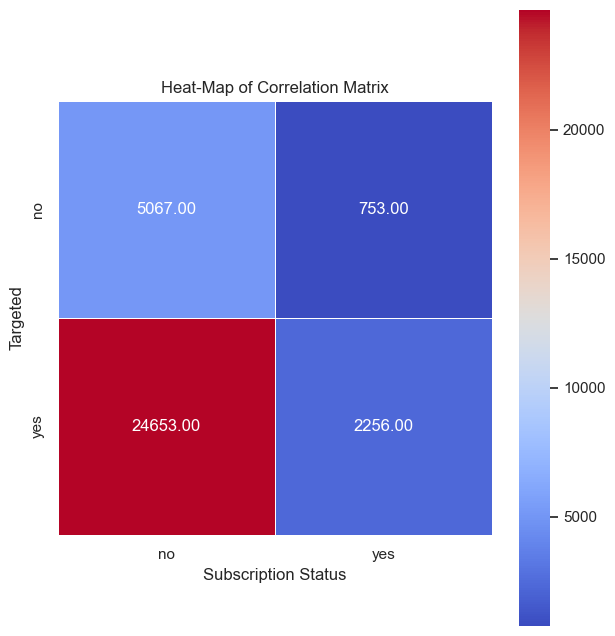

In [458]:
non_targeted_subscribers = df[(df['targeted']== 0) & (df['term-deposit_response']== 'yes')]
No_of_non_targeted_subscribers = non_targeted_subscribers.shape[0]
print(f"Non Targeted Subscribers : {No_of_non_targeted_subscribers}")
Targeted_subscribers = df[(df['targeted']== 1)&(df['term-deposit_response']=='yes')]
No_of_targeted_subscribers = Targeted_subscribers.shape[0]
print(f"Targeted Subscribers :{No_of_targeted_subscribers}")
correlation_matrix = pd.crosstab(df['targeted'],df['term-deposit_response'])
plt.figure(figsize = (7,8))
sns.heatmap(correlation_matrix,annot =True,fmt =".2f",cmap = 'coolwarm',cbar =True, square =True,linewidths =0.5)
plt.title("Heat-Map of Correlation Matrix")
plt.xlabel('Subscription Status')
plt.ylabel('Targeted')
plt.show()


## Education vs Term-Deposit Response

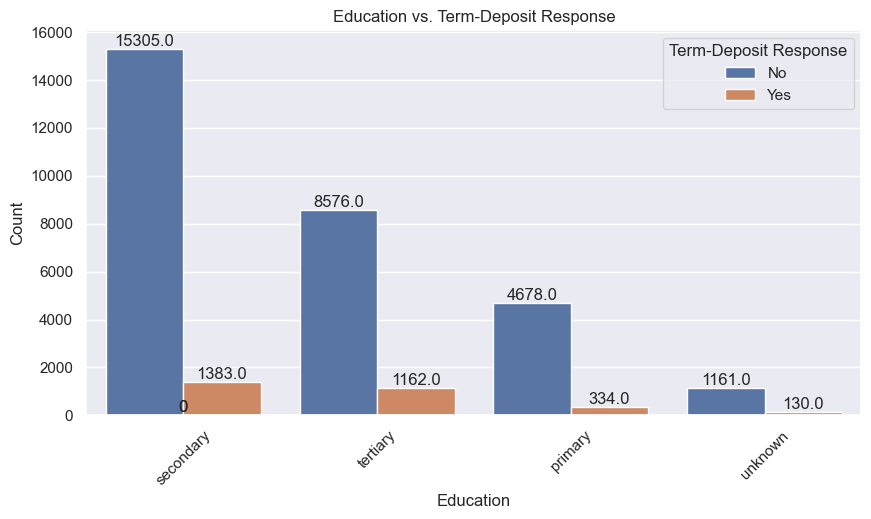

In [459]:
plt.figure(figsize=(10, 5))

count_plot = sns.countplot(data=df, x='education', hue='term-deposit_response', order=df['education'].value_counts().index)
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

plt.title('Education vs. Term-Deposit Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Term-Deposit Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


# TASK 5: Categorical Variables Analysis
## a. Investigate the distribution of categorical variables such as job type, education, and marital status.
## b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.


1. Demographic Information
-------------------------

JOB DISTRIBUTION:

job
blue-collar      7036
management       6943
technician       5518
admin.           3748
services         3017
retired          1556
self-employed    1134
entrepreneur     1087
housemaid         923
unemployed        919
student           666
unknown           182
Name: count, dtype: int64


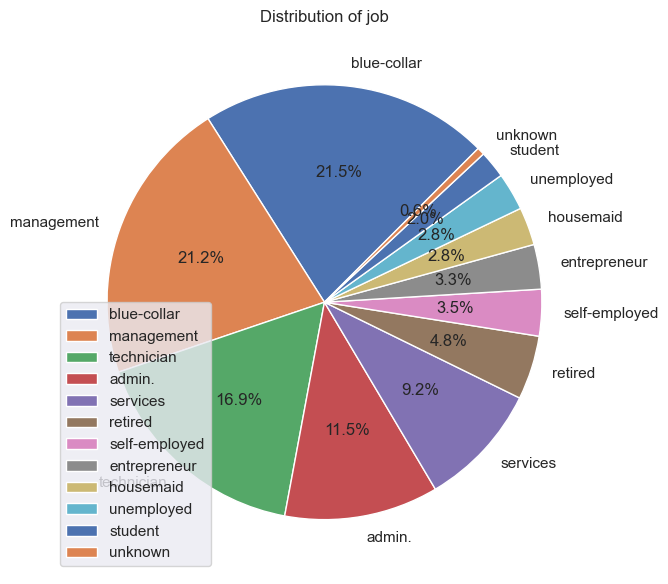


EDUCATION DISTRIBUTION:

education
secondary    16688
tertiary      9738
primary       5012
unknown       1291
Name: count, dtype: int64


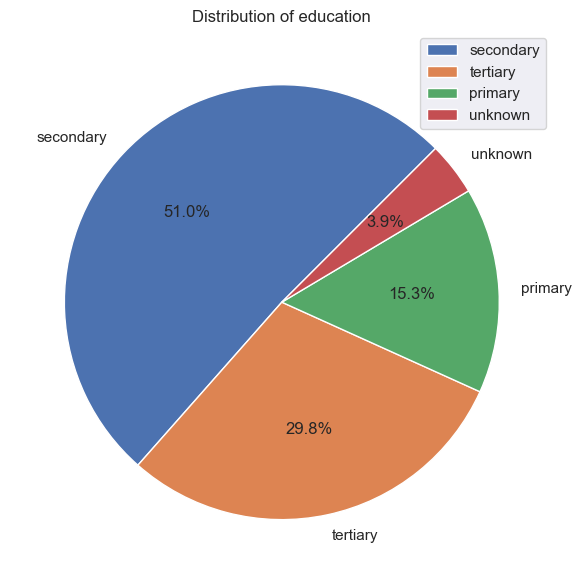


TARGETED DISTRIBUTION:

targeted
yes    26909
no      5820
Name: count, dtype: int64


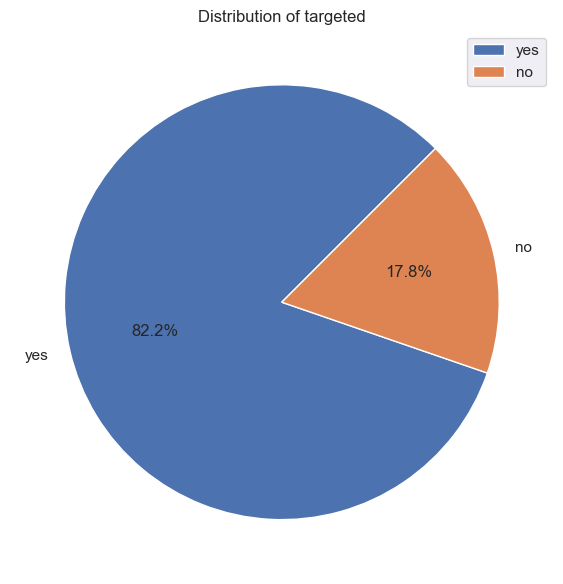


MARITAL_STATUS DISTRIBUTION:

marital_status
married     19812
single       9136
divorced     3781
Name: count, dtype: int64


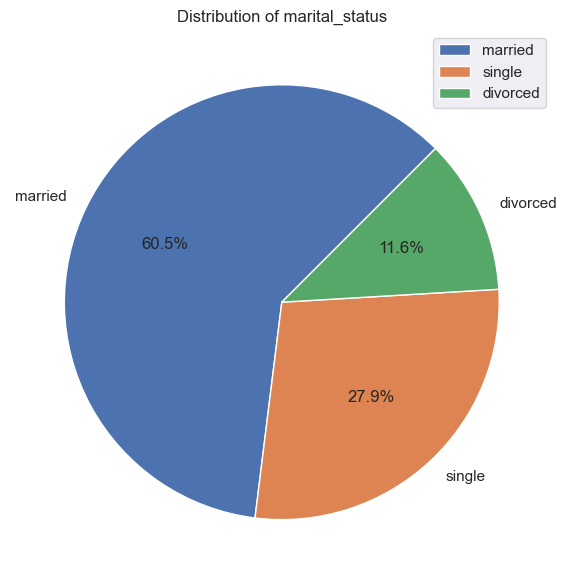


DEFAULT DISTRIBUTION:

default
no     32145
yes      584
Name: count, dtype: int64


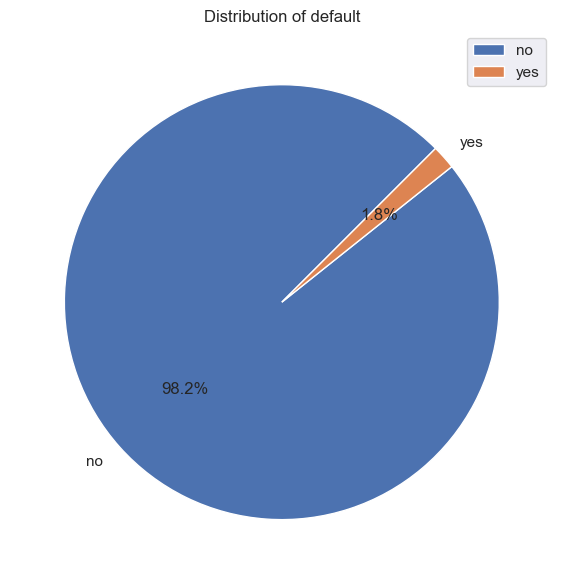


HOUSING_LOAN DISTRIBUTION:

housing_loan
yes    18292
no     14437
Name: count, dtype: int64


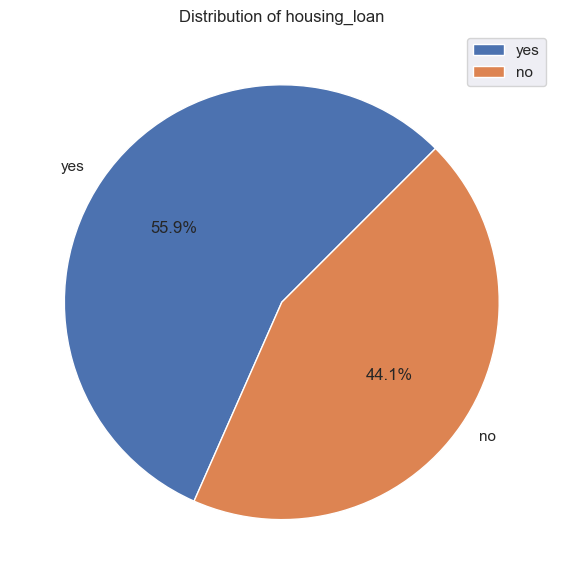


PERSONAL_LOAN DISTRIBUTION:

personal_loan
no     27345
yes     5384
Name: count, dtype: int64


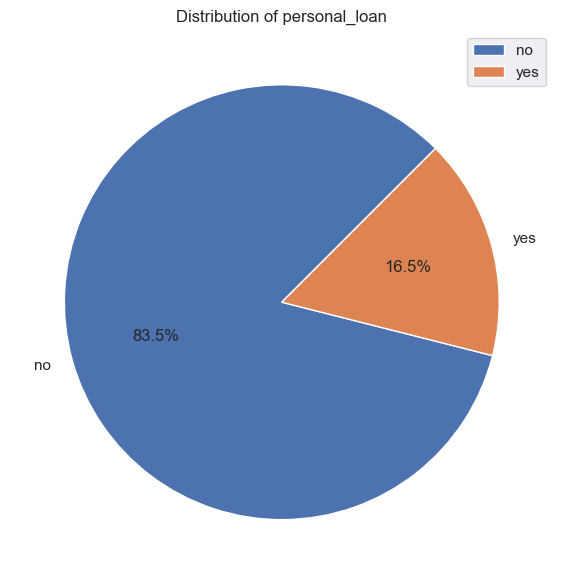

2. Contact Information
contact
cellular     21570
unknown       8929
telephone     2230
Name: count, dtype: int64


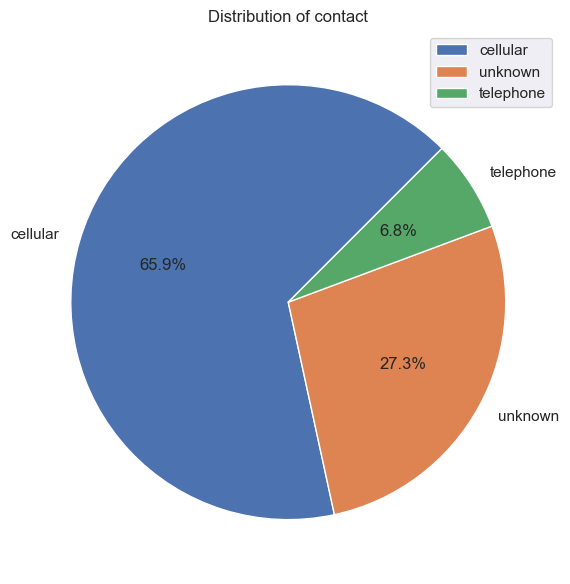

In [460]:
print("1. Demographic Information")
print("-"*25)
demographic_vars = ['job','education', 'targeted','marital_status',
       'default', 'housing_loan', 'personal_loan']

for var in demographic_vars:
    print(f"\n{var.upper()} DISTRIBUTION:\n")
    # Get the distribution of the independent variable
    var_distribution = df[var].value_counts()
    print(var_distribution)
    
    # Plot pie chart
    plt.figure(figsize=(8, 6))
    var_distribution.plot.pie(autopct='%1.1f%%', startangle=45)
    plt.title(f'Distribution of {var}')
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

print("2. Contact Information")

plt.figure(figsize=(8, 6))
contact = df['contact'].value_counts()
print(contact)
contact.plot.pie(autopct='%1.1f%%', startangle=45)
plt.title('Distribution of contact')
plt.legend()
plt.ylabel('')
plt.tight_layout()
plt.show()


# TASK 6: Temporal Analysis


## Steps for Temporal Analysis :-
### Convert Date Column to Datetime
### Extract Time Features
### Aggregate Data by Time Period (e.g., Month)
### Visualize Key Metrics Over Time
### Analyze Trends and Patterns

# 6(a.) Investigate temporal patterns in the success of the campaign over time.

In [461]:
# check dtype of date 
print("Check dtype of date: ")
print(f"Data Type of df['date'] = { df['date'].dtype}\n")

Check dtype of date: 
Data Type of df['date'] = datetime64[ns]



        month  Total_candidates  No_of_subscriptions  success_percent
0     January              1016                   86         8.464567
1    February              2000                  281        14.050000
2       March               340                  152        44.705882
3       April              2000                  337        16.850000
4         May              9814                  485         4.941920
5        June              3512                  259         7.374715
6        July              5045                  355         7.036670
7      August              4933                  429         8.696534
8   September               385                  143        37.142857
9     October               519                  189        36.416185
10   November              3041                  255         8.385400
11   December               124                   38        30.645161


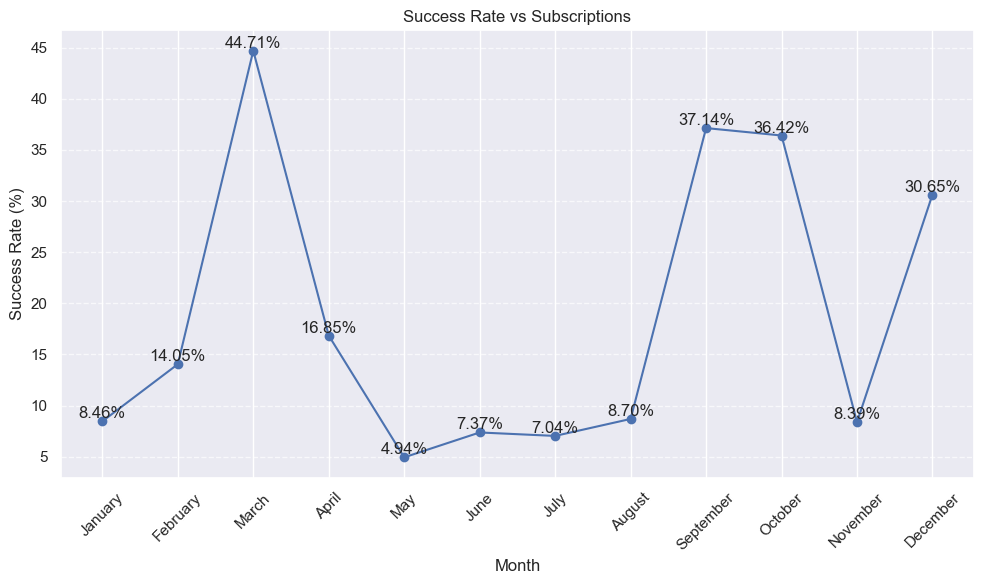

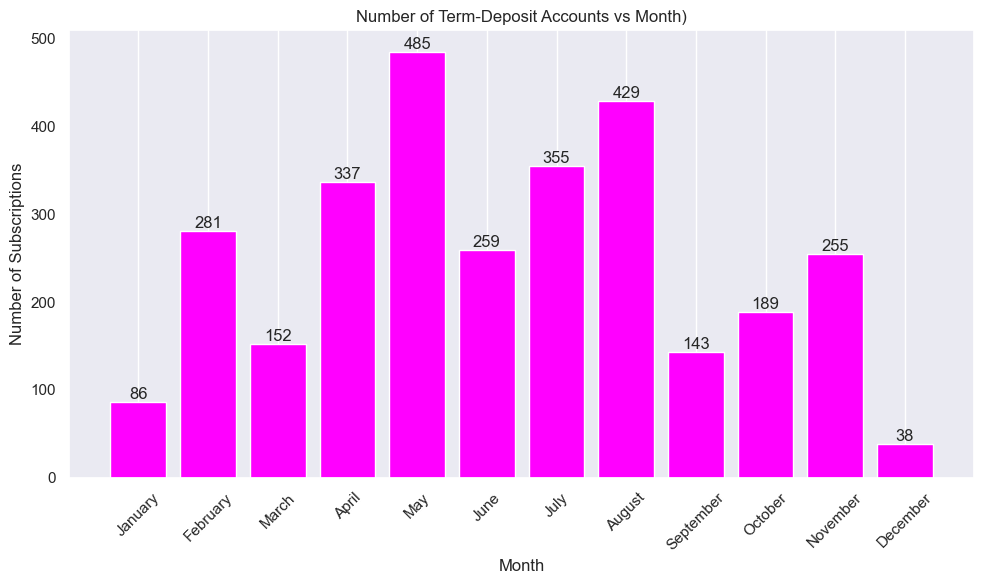

In [462]:
## Month vs Term Deposit Response
#Extract month from date column
df['month'] = df['date'].dt.strftime('%B')

# List months in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Monthly Summary : Survey Population monthwise, Count of subscriptions monthwise & Success Percent
monthly_summary = df.groupby('month').agg(
    Total_candidates=('term-deposit_response', 'size'),  # Count total rows (surveys)
    No_of_subscriptions=('term-deposit_response', lambda x: (x == 'yes').sum())  # Count 'yes' for subscriptions
).reset_index()
monthly_summary['success_percent'] = (monthly_summary['No_of_subscriptions']/monthly_summary['Total_candidates'])*100
print(monthly_summary)

# Plotting Bar Chart
# Plotting success percent 
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['month'].astype(str), monthly_summary['success_percent'], marker='o', color='b')
for i, value in enumerate(monthly_summary['success_percent']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')  # Format the value as a percentage


# Plotting Monthly Subscription of Term-Deposit Account (Monthwise)
plt.title('Success Rate vs Subscriptions')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_subscriptions['month'].astype(str), monthly_subscriptions['subscription_count'], color='magenta')

# Plotting Number of new Term-Deposit Account (Monthwise)
plt.title('Number of Term-Deposit Accounts vs Month)')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.)  # Add grid for better readability

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')  # Add text annotation

plt.tight_layout()  # Adjust layout
plt.show()


# 6(b.) Analyze if specific months or days exhibit superior campaign performance.


## (i)Max Subcription Count_date 

In [463]:
df['date'] = pd.to_datetime(df['date'])
daily_subcription = df[df['term-deposit_response']=='yes'].groupby(df['date'].dt.date).size().reset_index(name = 'subscription_count')
print(f"Day with maximum subscriptions :\n{daily_subcription.max()}")

Day with maximum subscriptions :
date                  2017-12-29
subscription_count            59
dtype: object


## Max Subcription Count & Max success percent month: 

In [464]:
max_subscription_month = monthly_subscriptions.loc[monthly_subscriptions['subscription_count'].idxmax()]
max_success_percent_month = monthly_summary.loc[monthly_summary['success_percent'].idxmax()]
print(f"Month with Max. Subscriptions  : \n{max_subscription_month}")
print(f"\n\nMonth with Max. Success Percent(%) : \n{max_success_percent_month}")


Month with Max. Subscriptions  : 
month                 May
subscription_count    485
Name: 4, dtype: object


Month with Max. Success Percent(%) : 
month                      March
Total_candidates             340
No_of_subscriptions          152
success_percent        44.705882
Name: 2, dtype: object


# TASK 7: Feature Engineering
## a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
## b. Apply encoding techniques to transform categorical variables if necessary.

## Ans.
### (i) Age-Group already reated, so Subcription analysis is given below

  Age-Group  New_Subcribers
0     18-25             174
1     26-35            1069
2     36-45             763
3     46-55             523
4     56-65             320
5       66+             160


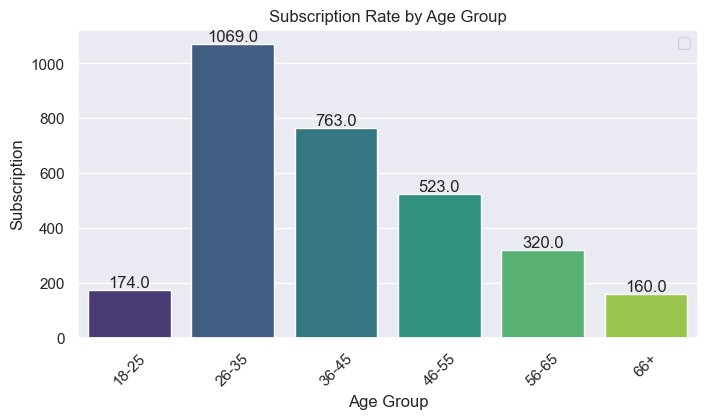

In [465]:
# Calculate subscription count
age_group_subscription = df[df['term-deposit_response']=='yes'].groupby('Age-Group').size().reset_index(name = 'New_Subcribers')
print(age_group_subscription)

#Plotting Bar Chart

plt.figure(figsize=(8, 4))
barplot = sns.barplot(x = 'Age-Group',y= 'New_Subcribers',data =age_group_subscription,palette='viridis')
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription')
plt.legend()
plt.xticks(rotation=45)

for p in barplot.patches:
    barplot.annotate(f'{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')


plt.show()

## (ii)Create Income Group and Analyse

In [466]:
df.columns

Index(['customerid', 'age', 'income', 'balance_amt', 'marital_status',
       'Age-Group', 'job', 'education', 'targeted', 'default', 'housing_loan',
       'personal_loan', 'contact', 'date', 'call_duration',
       'total_no_of_campaign', 'days_after_previous_campaign',
       'no_of_prev_campaign', 'previous_outcome', 'term-deposit_response',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'DISTPLOT : INCOME')

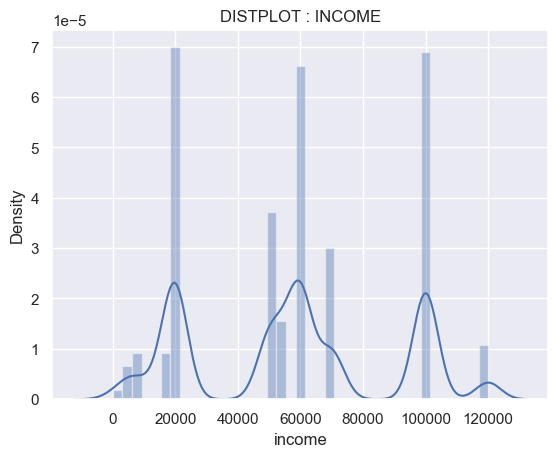

In [468]:
sns.distplot(df['income'])
plt.title("DISTPLOT : INCOME")

## Threshold Limit :
### LOW INCOME : Below 20000
### BELOW AVG. INCOME : 20000 to 60000
### ABOVE AVG. INCOME : 60000 to 100000
### HIGH INCOME : Above 100000

income_category
LOW AVG. INCOME     18992
HIGH AVG. INCOME     9960
LOW INCOME           2690
HIGH INCOME          1087
Name: count, dtype: int64


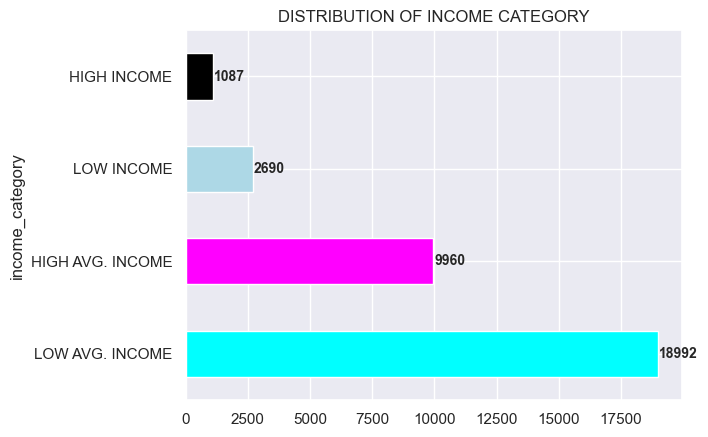

In [484]:
# Convert income to numeric if it's not already
df['salary'] = pd.to_numeric(df['income'], errors='coerce')

def categorize_income(income):
    if income < 20000:
        return 'LOW INCOME'
    elif income <= 60000:
        return 'LOW AVG. INCOME'
    elif income <= 100000:
        return 'HIGH AVG. INCOME'
    else:
        return 'HIGH INCOME'

# Create the income_category column
df['income_category'] = df['income'].apply(categorize_income)
income_counts = df['income_category'].value_counts()
print(income_counts)
bars = income_counts.plot(kind = 'barh',color =['cyan','magenta','lightblue','black'])
plt.title("DISTRIBUTION OF INCOME CATEGORY")
for bar in bars.patches:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10, fontweight = 'bold')

plt.show()

# TASK 8: Correlation Analysis
### a. Examine correlations between independent variables to identify multicollinearity.
### b. Evaluate how correlated features(df[['age', 'income', 'call_duration']] )may influence the target variable.


## (8a.) Examine correlations between independent variables to identify multicollinearity.

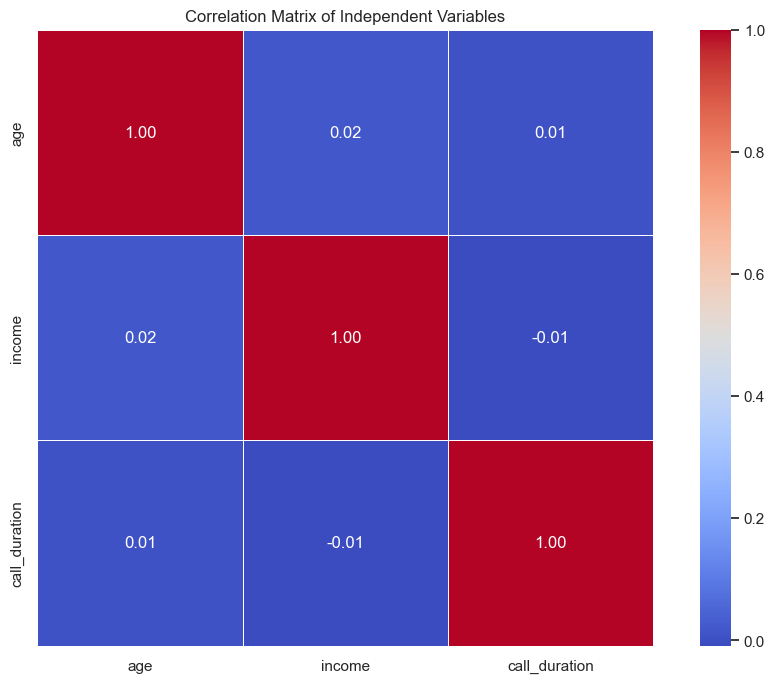

In [500]:
# Select independent variables
independent_vars = df[['age', 'income', 'call_duration']]
# If you have categorical variables, consider encoding them
independent_vars_encoded = pd.get_dummies(independent_vars, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = independent_vars_encoded.corr()


# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()


## (8.b) Evaluate how correlated features(df[['age', 'income', 'call_duration']] )may influence the target variable.

In [511]:
# Convert target variable to numeric (1 for 'yes', 0 for 'no')
df['term-deposit_response'] = df['term-deposit_response'].apply(lambda x: 1 if x == 'yes' else 0)

# Select relevant features
features = df[['age', 'income', 'call_duration', 'term-deposit_response']]


## STEP 1: Create BOXPLOT for ['age', 'income', 'call_duration', 'term-deposit_response']

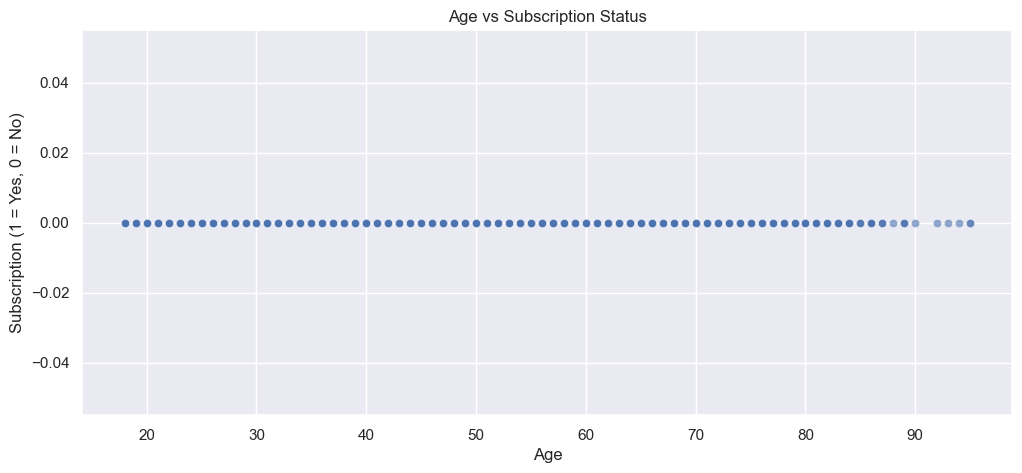

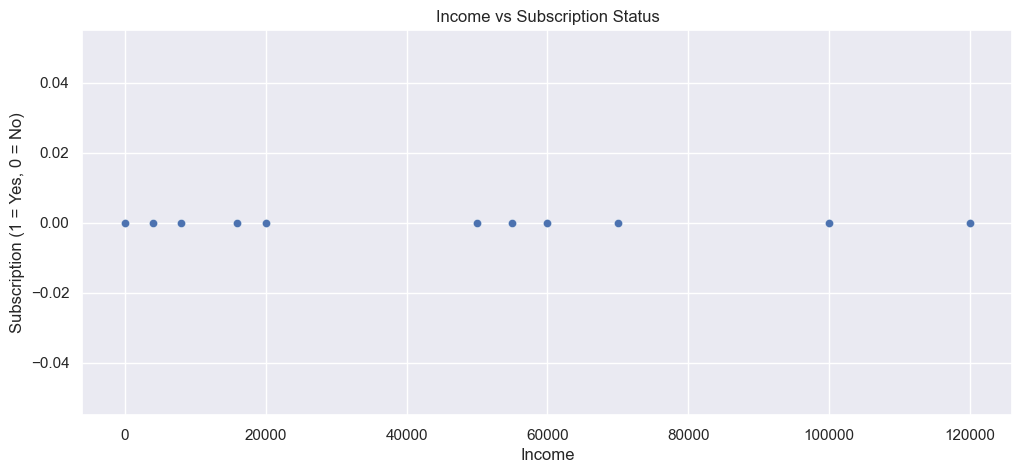

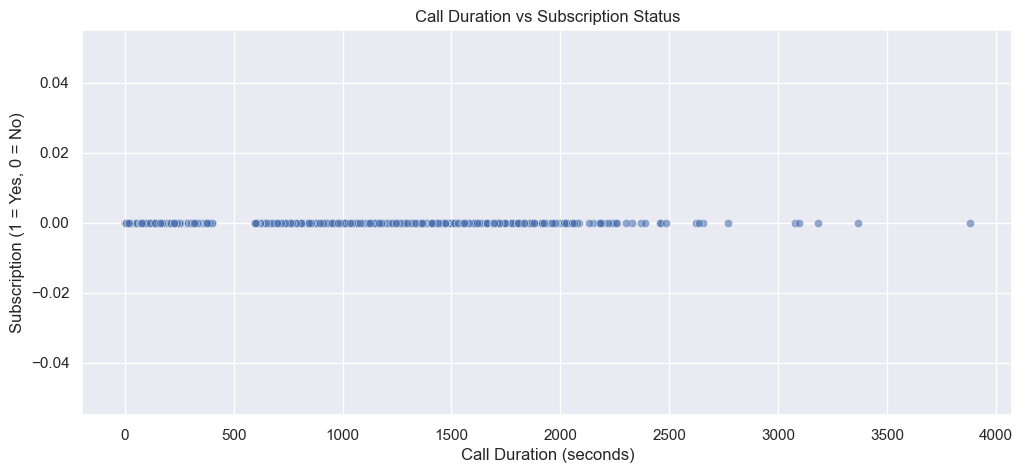

In [513]:

# Scatter plot for age vs. subscription
plt.figure(figsize=(12, 5))
sns.scatterplot(data=features, x='age', y='term-deposit_response', alpha=0.6)
plt.title('Age vs Subscription Status')
plt.xlabel('Age')
plt.ylabel('Subscription (1 = Yes, 0 = No)')
plt.show()

# Scatter plot for income vs. subscription
plt.figure(figsize=(12, 5))
sns.scatterplot(data=features, x='income', y='term-deposit_response', alpha=0.6)
plt.title('Income vs Subscription Status')
plt.xlabel('Income')
plt.ylabel('Subscription (1 = Yes, 0 = No)')
plt.show()

# Scatter plot for call duration vs. subscription
plt.figure(figsize=(12, 5))
sns.scatterplot(data=features, x='call_duration', y='term-deposit_response', alpha=0.6)
plt.title('Call Duration vs Subscription Status')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Subscription (1 = Yes, 0 = No)')
plt.show()


## STEP 2: Calculate the correlation matrix for the features


In [527]:
correlation_matrix = features.corr()
print("Correlation Matrix :")
print("-"*20)
print(f"\n{correlation_matrix}")
print("*"*120)

# Specifically check correlations with the target variable
correlation_with_target = correlation_matrix['term-deposit_response'].drop('term-deposit_response')
print("\ncorrelation_with_target")
print(correlation_with_target)


Correlation Matrix :
--------------------

                            age    income  call_duration  \
age                    1.000000  0.018408       0.005424   
income                 0.018408  1.000000      -0.008767   
call_duration          0.005424 -0.008767       1.000000   
term-deposit_response       NaN       NaN            NaN   

                       term-deposit_response  
age                                      NaN  
income                                   NaN  
call_duration                            NaN  
term-deposit_response                    NaN  
************************************************************************************************************************

correlation_with_target
age             NaN
income          NaN
call_duration   NaN
Name: term-deposit_response, dtype: float64


## Result : 
## No correlation was observed between selected Independent variables and Target variable

# TASK 9: Outlier Detection and Handling
## a. Identify and rectify outliers that could impact the analysis and predictions.


## STEP 1:Box plot for Outlier Detection

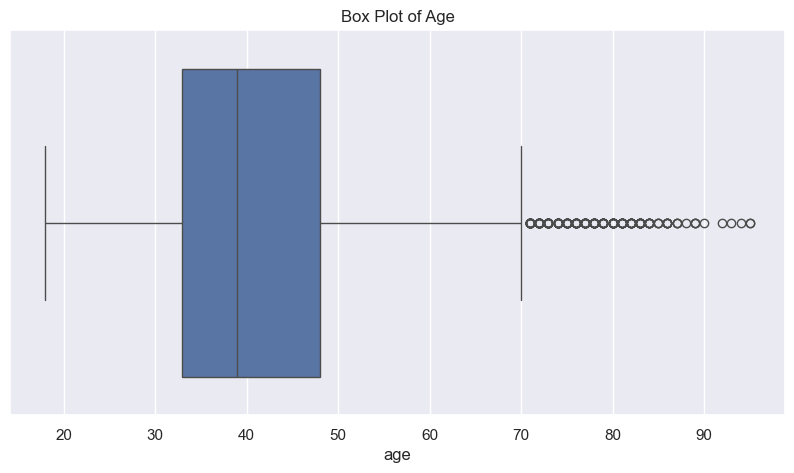

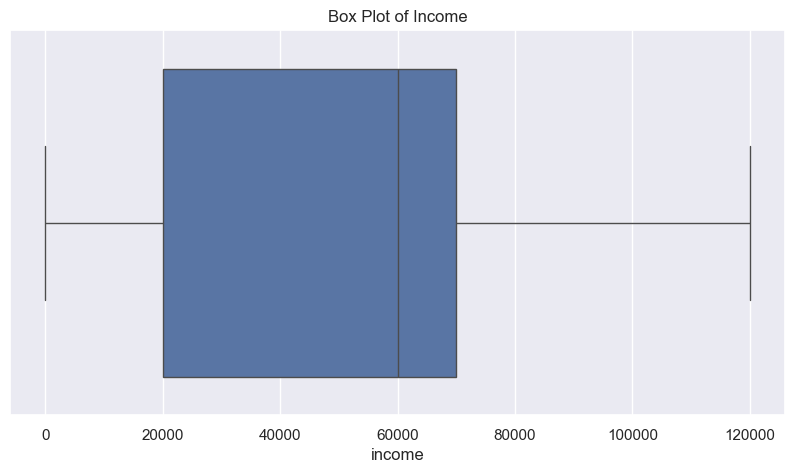

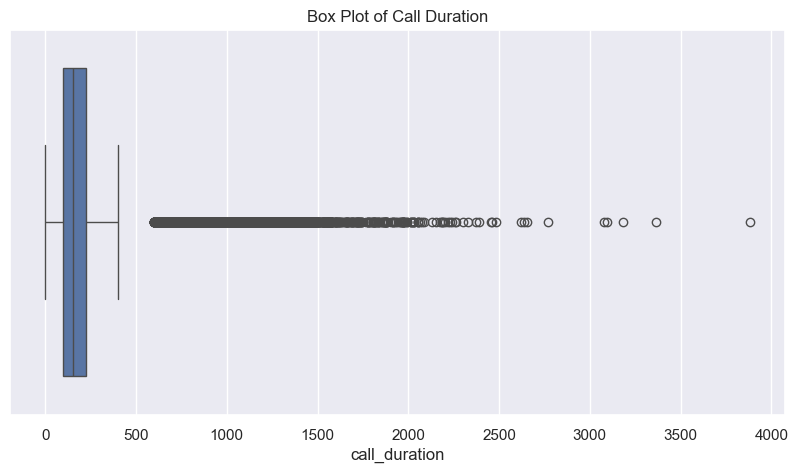

In [532]:
# Box plot for 'age'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age')
plt.show()

# Box plot for 'income'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income')
plt.title('Box Plot of Income')
plt.show()

# Box plot for 'duration'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='call_duration')
plt.title('Box Plot of Call Duration')
plt.show()


## STEP 2: Detect Outliers using IQR

In [534]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Identify outliers for 'age'
age_outliers = detect_outliers_iqr(df['age'])
print(f"Age outliers:\n{age_outliers}")

# Identify outliers for 'income'
income_outliers = detect_outliers_iqr(df['income'])
print(f"Income outliers:\n{income_outliers}")

# Identify outliers for 'duration'
duration_outliers = detect_outliers_iqr(df['call_duration'])
print(f"Duration outliers:\n{duration_outliers}")


Age outliers:
21340    83
21415    75
21869    75
22133    72
22669    76
         ..
32673    73
32676    78
32679    78
32694    77
32728    72
Name: age, Length: 306, dtype: int64
Income outliers:
Series([], Name: income, dtype: int64)
Duration outliers:
29       1666
34       1492
48       1778
69       1042
71       1467
         ... 
32701     600
32723    1166
32724    1556
32727     977
32728    1127
Name: call_duration, Length: 2975, dtype: int64


## STEP 3: Remove Outliers


In [537]:
# Capping outliers for 'age'
df['age'] = df['age'].clip(lower=df['age'].quantile(0.01), upper=df['age'].quantile(0.99))

# Capping outliers for 'income'
df['income'] = df['income'].clip(lower=df['income'].quantile(0.01), upper=df['income'].quantile(0.99))

# Capping outliers for 'duration'
df['call_duration'] = df['call_duration'].clip(lower=df['call_duration'].quantile(0.01), upper=df['call_duration'].quantile(0.99))


## STEP : Evaluate after removing Outliers

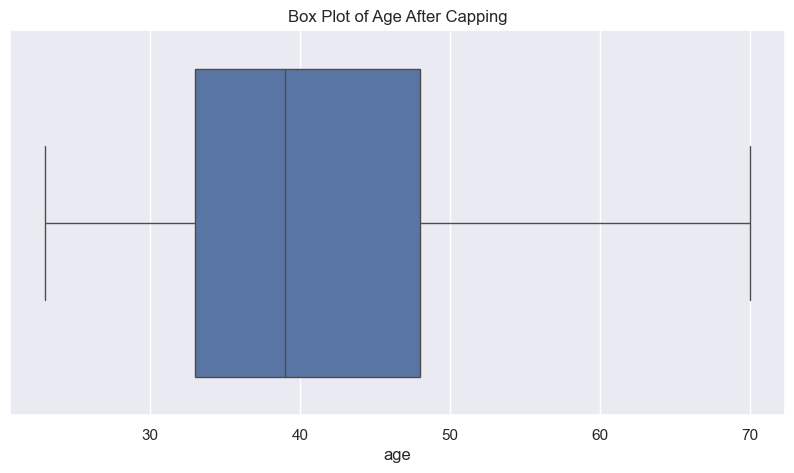

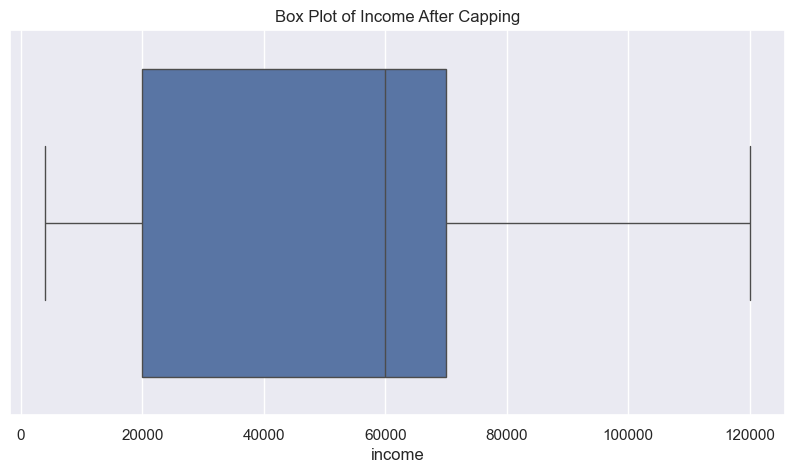

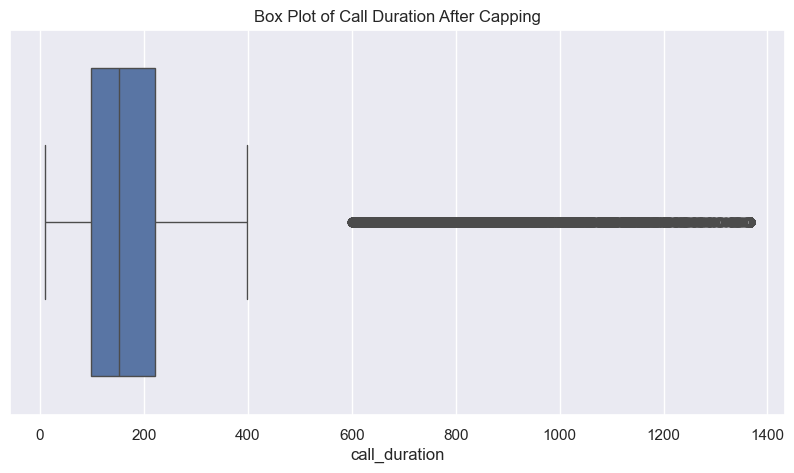

In [540]:
# Box plot after handling outliers for 'age'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age After Capping')
plt.show()

# Box plot after handling outliers for 'income'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income')
plt.title('Box Plot of Income After Capping')
plt.show()

# Box plot after handling outliers for 'call_duration'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='call_duration')
plt.title('Box Plot of Call Duration After Capping')
plt.show()
